# DS 3000 HW 7

Due: Fri Apr 8 @ 11:59 PM EST

### Submission Instructions
Submit this `ipynb` file to [gradescope](https://www.gradescope.com/courses/337250).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh `Kernel > Restart & Run All` just before uploading the `ipynb` file to gradescope.

### Tips for success
- Start early
- Make use of [Piazza](https://course.ccs.neu.edu/ds3000/admin.html#piazza-discussion-forum)
- Make use of [Office Hours](https://course.ccs.neu.edu/ds3000/office_hours.html)
- Remember that [Documentation / style counts for credit](https://course.ccs.neu.edu/ds3000/style_guide.html)
- Under no circumstances may one student view or share their ungraded homework or quiz with another student [(see also)](https://course.ccs.neu.edu/ds3000/syllabus.html#academic-integrity-and-conduct)

<p style="color:blue;">Note that this HW has 75 total points to reflect the fact that its a bit shorter than others.  It will be weighed .75 as much as a 100 point HW.</p>

# What contributes to property prices in the Boston area?

We're going to analyze a dataset that contains nearly 1000 different condos and houses currently available for sale in the Boston area. Based on the features of a place and it's location we will try to predict its price.

In [1]:
import pandas as pd

df_pro = pd.read_csv('boston_houses.csv', index_col=None)

df_pro.head(2)

,beds,baths,area,distance,price,price_bucket
0,3.0,2.0,2584.0,18.726140,1100000.0,price >= 900k
1,1.0,1.0,650.0,1.053808,699000.0,600k <= price < 900k


We will try to predict `price`.  To do so, we'll examine:
- number of bedrooms: `beds`
- number of bathrooms: `baths`
- area in sq feet: `area`
- distance in km from the Boston Common: `distance`

We will use the following ML models:
- Decision Trees
- Random Forest Classifiers
- Random Forest Regressors

And interpret their parameters (Feature Importances in the Random Forest models) to try to understand which features are helpful in predicting price.  

## Part 1: Decision Tree (20 points)
Decision Trees and Random Forests Classifiers, by virtue of being classifiers, estimate a categorical variable.  Our target variable is `price`, which we can approximated by binning, as has been done in `price_bucket`:

In [2]:
df_pro['price_bucket'].value_counts()

price < 600k            321
price >= 900k           320
600k <= price < 900k    313
Name: price_bucket, dtype: int64

1. Build a Decision Tree with `max_depth=2` which estimates the `price_bucket` of housing using 
    - beds
    - baths
    - area
    - distance
1. Plot the tree using `plot_tree()`.  To help the visualize be easily understood:
    - initialize a figure before calling `plot_tree()` which is `(12, 5)` inches
        - see class notes for example of this syntax
    - utlize the `class_names` input to `plot_tree()` which shows the most common class among the `values` shown
1. Validate your tree by identifying one intuitive behavior which it replicates (e.g. larger houses tend to be more expensive)
    - Remember the convention for reading the tree:
        - yes -> left
        - no -> right
    - The order of counts in each node's "value" is according to first appearance in the y list 
        - same as output of `np.unique()` below    
    - Please write your response in a markdown cell just below the tree itself


In [3]:
import numpy as np
np.unique(df_pro['price_bucket'])

array(['600k <= price < 900k', 'price < 600k', 'price >= 900k'],
      dtype=object)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, r2_score
from sklearn.linear_model import LinearRegression

# Building Decision Tree

In [5]:
# set max_depth
max_depth = 2

# assign x and y features
x_feat_list = ['beds', 'baths', 'area', 'distance']
y_feat = 'price_bucket'

# get data from df_pro
x = df_pro.loc[:, x_feat_list].values
y = df_pro.loc[:, y_feat].values

# decision tree classifier
dec_tree_clf = tree.DecisionTreeClassifier(max_depth=max_depth)

# fit
dec_tree_clf = dec_tree_clf.fit(x, y)

# Plotting Tree

DecisionTreeClassifier(max_depth=2)

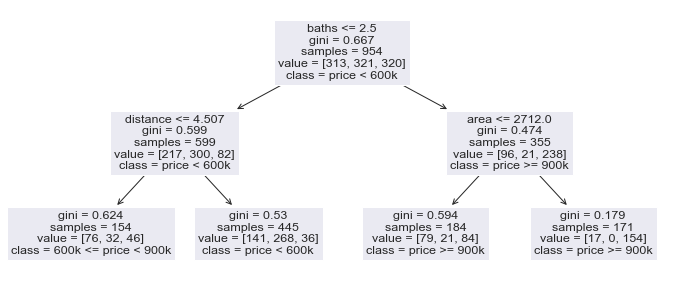

In [6]:
# plot tree with plot_tree()
sns.set()
plt.figure()
plt.gcf().set_size_inches(12, 5)

# plot tree
tree.plot_tree(dec_tree_clf, 
              feature_names=x_feat_list,
              class_names=dec_tree_clf.classes_)

dec_tree_clf

# Tree Validation

An intuitive behavior from this decision tree is that apartments with more than 2.5 bathrooms will have a higher price than apartments with <= 2.5 bathrooms. The decision tree clearly shows this after branching off the first node to the left, where the apartment with <= 2.5 bathrooms is worth less than 600k, but the apartment branching off to the right (meaning it does not have <= 2.5 bathrooms) is worth >= 900k. This pattern continues down the rest of the tree, where the left side has prices < 600k and and the right side has prices >= 900k.

## Part 2: Random Forest Classification (23 points)
We'd like to quantify how significant each feature (i.e. 'beds', 'baths', 'area', 'distance') is to create an expensive property via a Random Forest Analysis.  Of course, because

# Nobody cares how important each feature is in a classifier which doesn't work

we should be sure to validate that our classifier is able to predict `price_bucket` with reasonable accuracy (in this case, it does have reasonable accuracy).

Using 10 fold cross validation with a Random Forest (max_depth=3) and the same x, y definitions as above:
- construct a confusion matrix which shows performance
- compute accuracy via `accuracy_score`

# Random Forest Classifier

In [7]:
# random forest classifier
rf_clf = RandomForestClassifier(n_estimators=100)

# fit
rf_clf.fit(x, y)

RandomForestClassifier()

# 10 Fold Cross Validation

In [8]:
# 10 fold cross validation 

# set n_splits to 10
n_splits = 10

# set max_depth to 3
max_depth = 3

# initialize kfold
kfold = StratifiedKFold(n_splits=n_splits)

# initialize a random forest classifier
rf_clf = RandomForestClassifier(max_depth=max_depth)

# initialize y_pred which stores y predictions
y_pred = np.empty_like(y)

for train_idx, test_idx in kfold.split(x, y):
    
    # index to split training / test data
    x_train = x[train_idx, :]
    x_test = x[test_idx, :]
    y_train = y[train_idx]
    
    # fit 
    rf_clf = rf_clf.fit(x_train, y_train)

    # estimate
    y_pred[test_idx] = rf_clf.predict(x_test)

# Confusion Matrix

Text(0.5, 1.0, 'Random Forest where max_depth=3')

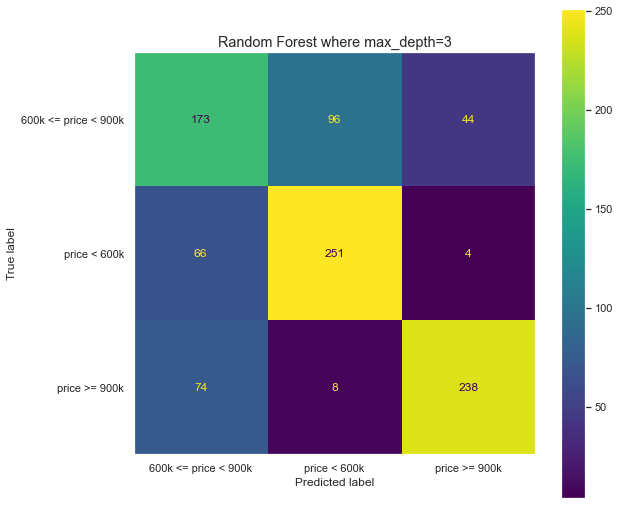

In [9]:
# create confusion matrix 
conf_mat = confusion_matrix(y_true=y, y_pred=y_pred)

# create display of confusion matrix
conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y))

# plot confusion matrix
conf_mat_disp.plot()

# set font size
sns.set(font_scale=1.2)

# set plot size
plt.gcf().set_size_inches(9, 9)

# turn grid off
plt.grid(False)

# create title
plt.title('Random Forest where max_depth=3')

## Part 3 Feature Importance in Random Forest (16 points)
1. Fit a Random Forest Classifier on the *entire dataset.  
1. Plot the Feature Importances, mean reduction in Gini scores, via `plot_feat_import()`.
1. Write 1 or 2 sentences which are easily understood by a non-technical reader which synthesize the key takeaway message of the plot. Make sure you remind the reader what `price_bucket` means
    - write your response in a markdown cell below the plot itself please

*without k-fold Cross Validation ... remember that doing so yields k distinct classifiers which likely have slightly different feature importances.  By training on the entire dataset we implicitly "average" across the whole dataset.

# Fit Random Forest Classifier

In [10]:
# random forest classifier
rf_clf = RandomForestClassifier(n_estimators=100)

# fit random forest to data
rf_clf.fit(x, y)

RandomForestClassifier()

In [11]:
def plot_feat_import(feat_list, feat_import, sort=True, limit=None):
    """ plots feature importances in a horizontal bar chart
    
    Args:
        feat_list (list): names of features (str)
        feat_import (np.array): feature importances (mean gini reduce)
        sort (bool): if True, sorts features in decreasing importance
            from top to bottom of plot
        limit (int): if passed, limits the number of features shown
            to this value    
    """
    
    if sort:
        
        # sort features importance in decreasing
        idx = np.argsort(feat_import).astype(int)
        feat_list = [feat_list[_idx] for _idx in idx]
        feat_import = feat_import[idx] 
        
    if limit is not None:
        
        # first limit feature
        feat_list = feat_list[:limit]
        feat_import = feat_import[:limit]
    
    # plot and label feature importance
    plt.barh(feat_list, feat_import)
    plt.gcf().set_size_inches(5, len(feat_list) / 2)
    plt.xlabel('Feature importance\n(% decrease in Gini due to each feature)')

# Plot Feature Importance

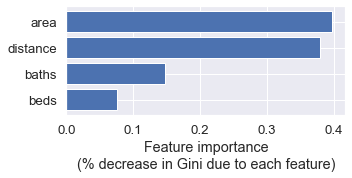

In [12]:
plot_feat_import(x_feat_list, rf_clf.feature_importances_)

## Part 4: Ethical applications of this model in the context of redlining (16 points)

Using any housing model built and trained as above could (and likely would) do real harm to people if used without careful thought.  Remember, these models only mimic and recreate the relationships between housing features and price in input data.  Given this, the predictions should be understood as a reflection of the flawed world from which they come.  In the case of predicting housing prices in Boston, we should be mindful of race.  Using data from a racist world yields a racially biased model which, in turn, promotes racism when used to predict housing prices.

Using the resources listed below, identify two distinct ways in which a biased model (one which overvalues the houses of white people while undervaluing the houses of people of color) might propogate racism if used to predict housing values (e.g. such a model is used by Zillow or similar).  

Please give each of the two impacts its own markdown heading (###) and write one to three sentences which characterize it.

- [Wikipedia on Redlining](https://en.wikipedia.org/wiki/Redlining)
    - good background
- [NPR Video (start here)](https://youtu.be/O5FBJyqfoLM) 
    - great summary
    - hint: they do mention 4 specific impacts of redlining ... any two would be sufficient here
    - be mindful of some spicy language by Chris Rock which opens the video
        - skip 20 seconds to avoid if you prefer
- [NYTimes article](https://www.nytimes.com/2021/03/20/opinion/home-value-race-taxes.html) 
    - strong, specific stats
    - compelling single example
    
Note that the negative impact of the model does not require the model's builder have malicious intentions, or even consider race at all in the model's construction (race may be correlated with other input features).  These facts should give us pause as we build models for use in the real world: machine learning which hurts people can (and has) happened when model builders are not critical and thoughtful about their impact.

### Impact 1: School Bias

The first way that biased models can propogate racism is through having houses in primarily black or minority areas be valued low, but not include the impact of the school in the area. The historically worse schools due to lack of funding through property taxes will then in turn make the minority neighborhoods worth less. This is is an issue that was created in the past and continuing it today through biased models will only continue racism. 

### Impact 2: Health Bias


Models need to find ways to value houses fairly without considering factors such as proximity to factory plans because the zoning was done in the pass based on race. Figuring out ways to value houses based solely on the attributes of the house or apartments is vital to ensure that health factors are not included because that unfairly targets minorities. 